In [0]:
!pip install tensorflow==2.0.0 -q

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [0]:
x_train, x_test = x_train/255.0, x_test/255.0

In [15]:
x_train[0].shape

(28, 28, 1)

In [0]:
#Adding dimenssion to convert 2d data to 3d data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1) 

In [16]:
#finding out the number of classes in the dataset
K = len(set(y_train))
print(str(K))

10


In [0]:
#Building the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, padding='same',activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)

In [18]:
#Compiling and Fitting the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)

r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.4379 - accuracy: 0.8400 - val_loss: 0.3594 - val_accuracy: 0.8654
Epoch 2/15
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.2950 - accuracy: 0.8903 - val_loss: 0.2862 - val_accuracy: 0.8937
Epoch 3/15
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.2514 - accuracy: 0.9054 - val_loss: 0.2746 - val_accuracy: 0.9001
Epoch 4/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2179 - accuracy: 0.9188 - val_loss: 0.2587 - val_accuracy: 0.9040
Epoch 5/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1917 - accuracy: 0.9285 - val_loss: 0.2561 - val_accuracy: 0.9077
Epoch 6/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1695 - accuracy: 0.9359 - val_loss: 0.2606 - val_accuracy: 0.9092
Epoch 7/15
60000/60000 [==============================] 

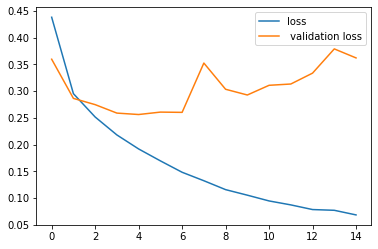

In [19]:
#plotting loss and accuracy
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = ' validation loss')
plt.legend()

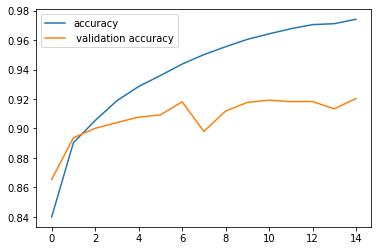

In [20]:
#plotting loss and accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = ' validation accuracy')
plt.legend()

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
type(x_test[0])

In [0]:
p_test = model.predict(x_test).argmax(axis=1)

In [0]:
CM = confusion_matrix(y_test, p_test)

In [24]:
CM

array([[870,   1,  16,  11,   3,   0,  89,   0,  10,   0],
       [  1, 983,   0,  10,   3,   0,   2,   0,   1,   0],
       [ 16,   1, 872,   7,  63,   0,  40,   0,   1,   0],
       [  9,   2,  10, 937,  18,   1,  21,   0,   2,   0],
       [  0,   0,  41,  32, 879,   1,  47,   0,   0,   0],
       [  0,   0,   0,   0,   0, 983,   0,  12,   0,   5],
       [ 91,   3,  54,  18,  57,   0, 763,   0,  14,   0],
       [  0,   0,   0,   0,   0,   7,   0, 956,   0,  37],
       [  2,   2,   3,   0,   1,   2,   4,   3, 983,   0],
       [  1,   0,   0,   0,   0,   6,   0,  16,   0, 977]])

In [0]:
#Label Mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'True label: Pullover Predicted label: Shirt')

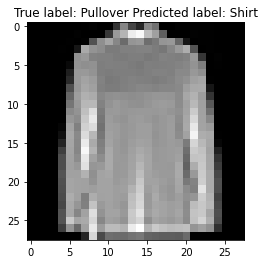

In [32]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: " + str(labels[y_test[i]]) + " Predicted label: " + str(labels[p_test[i]]) )